# Лабораторная работа 2
### Выполнил: Затопляев Ростислав Артемович

### EDA (исследовательский анализ данных)

In [1]:
# импорт необходимых библиотек
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
random.seed(42)
np.random.seed(42)

In [4]:
# читаем тренировочные и тестовые данныые
train_features = pd.read_csv('DOTA2_TRAIN_features.csv')
train_targets = pd.read_csv('DOTA2_TRAIN_targets.csv')
test = pd.read_csv('DOTA2_TEST_features.csv')

In [5]:
pd.set_option('display.max_rows', 350)
pd.set_option('display.max_columns', 350)

In [6]:
print(f'размер train: {train_features.shape}')
print(f'размер test: {test.shape}')

размер train: (27772, 246)
размер test: (11903, 246)


#### Посмотрим на содержание датасета

In [7]:
train_features.head(3)

,match_id,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,r1_gold,r1_lh,r1_xp,r1_health,r1_max_health,r1_max_mana,r1_level,r1_x,r1_y,r1_stuns,r1_creeps_stacked,r1_camps_stacked,r1_rune_pickups,r1_firstblood_claimed,r1_teamfight_participation,r1_towers_killed,r1_roshans_killed,r1_obs_placed,r1_sen_placed,r2_hero_id,r2_kills,r2_deaths,r2_assists,r2_denies,r2_gold,r2_lh,r2_xp,r2_health,r2_max_health,r2_max_mana,r2_level,r2_x,r2_y,r2_stuns,r2_creeps_stacked,r2_camps_stacked,r2_rune_pickups,r2_firstblood_claimed,r2_teamfight_participation,r2_towers_killed,r2_roshans_killed,r2_obs_placed,r2_sen_placed,r3_hero_id,r3_kills,r3_deaths,r3_assists,r3_denies,r3_gold,r3_lh,r3_xp,r3_health,r3_max_health,r3_max_mana,r3_level,r3_x,r3_y,r3_stuns,r3_creeps_stacked,r3_camps_stacked,r3_rune_pickups,r3_firstblood_claimed,r3_teamfight_participation,r3_towers_killed,r3_roshans_killed,r3_obs_placed,r3_sen_placed,r4_hero_id,r4_kills,r4_deaths,r4_assists,r4_denies,r4_gold,r4_lh,r4_xp,r4_health,r4_max_health,r4_max_mana,r4_level,r4_x,r4_y,r4_stuns,r4_creeps_stacked,r4_camps_stacked,r4_rune_pickups,r4_firstblood_claimed,r4_teamfight_participation,r4_towers_killed,r4_roshans_killed,r4_obs_placed,r4_sen_placed,r5_hero_id,r5_kills,r5_deaths,r5_assists,r5_denies,r5_gold,r5_lh,r5_xp,r5_health,r5_max_health,r5_max_mana,r5_level,r5_x,r5_y,r5_stuns,r5_creeps_stacked,r5_camps_stacked,r5_rune_pickups,r5_firstblood_claimed,r5_teamfight_participation,r5_towers_killed,r5_roshans_killed,r5_obs_placed,r5_sen_placed,d1_hero_id,d1_kills,d1_deaths,d1_assists,d1_denies,d1_gold,d1_lh,d1_xp,d1_health,d1_max_health,d1_max_mana,d1_level,d1_x,d1_y,d1_stuns,d1_creeps_stacked,d1_camps_stacked,d1_rune_pickups,d1_firstblood_claimed,d1_teamfight_participation,d1_towers_killed,d1_roshans_killed,d1_obs_placed,d1_sen_placed,d2_hero_id,d2_kills,d2_deaths,d2_assists,d2_denies,d2_gold,d2_lh,d2_xp,d2_health,d2_max_health,d2_max_mana,d2_level,d2_x,d2_y,d2_stuns,d2_creeps_stacked,d2_camps_stacked,d2_rune_pickups,d2_firstblood_claimed,d2_teamfight_participation,d2_towers_killed,d2_roshans_killed,d2_obs_placed,d2_sen_placed,d3_hero_id,d3_kills,d3_deaths,d3_assists,d3_denies,d3_gold,d3_lh,d3_xp,d3_health,d3_max_health,d3_max_mana,d3_level,d3_x,d3_y,d3_stuns,d3_creeps_stacked,d3_camps_stacked,d3_rune_pickups,d3_firstblood_claimed,d3_teamfight_participation,d3_towers_killed,d3_roshans_killed,d3_obs_placed,d3_sen_placed,d4_hero_id,d4_kills,d4_deaths,d4_assists,d4_denies,d4_gold,d4_lh,d4_xp,d4_health,d4_max_health,d4_max_mana,d4_level,d4_x,d4_y,d4_stuns,d4_creeps_stacked,d4_camps_stacked,d4_rune_pickups,d4_firstblood_claimed,d4_teamfight_participation,d4_towers_killed,d4_roshans_killed,d4_obs_placed,d4_sen_placed,d5_hero_id,d5_kills,d5_deaths,d5_assists,d5_denies,d5_gold,d5_lh,d5_xp,d5_health,d5_max_health,d5_max_mana,d5_level,d5_x,d5_y,d5_stuns,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed
0,b29797296e310d2275f2cd67eeacf2eb,2117,22,7,15,1,5,4.0,9,15,0,8997,33,14849,1450,1450,854.938,18,100,116,64.543,0,0,10,0,0.576,0,0,14,15,17,6.0,5,5,3,14074,172,17166,1301,1320,1742.939,20,90,124,20.754,9,2,7,0,0.333,0,0,0,0,59,13.0,14,7,17,16285,175,17455,1928,3120,650.938,20,112,112,0.000,0,0,5,0,0.606,0,1,0,0,26,5.0,2,14,10,12306,52,17593,2030,2030,1368.939,20,100,112,152.313,3,1,13,0,0.576,0,0,0,0,12,2.0,8,10,10,12178,134,15145,1520,1520,914.938,18,104,110,0.000,0,0,7,0,0.364,1,0,0,3,2,14,9,11,0,14789,111,22155,2335,2335,1149.939,23,104,140,0.000,0,0,7,0,0.676,0,0,0,0,57,4,5,14,3,12847,56,19456,2355,2355,1291.939,21,126,130,0.000,0,0,7,1,0.486,0,1,6,8,84,8,7,8,7,13033,52,18275,1980,1980,1424.939,20,126,128,41.982,1,1,19,0,0.432,2,0,8,3,34,6,5,7,19,100000000,202,20374,1680,1680,1466.939,22,128,132,0.000,3,1,4,0,0.351,1,0,1,0,35,4,7,11,3,15722,198,14915,2185,2185,1368.939,18,126,132,0.133,3,1,7,0,0.405,0,0,0,0
1,49908f2a11d8bc01f6dad6fbf2e

#### Интерпретация признаков

- Имеем 2 команды по 5 игроков - силы света (r1-r5) против сил тьмы (d1-d5)      
- Для каждого игрока имеем 24 статистических показателя   
- И общие признаки матча - 6 штук

#### Общие признаки матча:   
- match_id - id матча
- game_time - продолжительность матча
- game_mode - режим игры
- lobby_type - тип лобби (публичное, турнирное)
- objectives_len - кол-во выполненных задач
- chat_len - длина чата

#### Признаки для игроков r1-r5 и d1-d5:
**Основная статистика**
- hero_id - id героя
- kills - кол-во убийств
- deaths - кол-во смертей
- assists - кол-во помощей
- denies - убийства своих крипов
- gold - золото
- lh(last hits) - убийства вражеских крипов
- xp - опыт     
**Статус героя**    
- health - текущее здоровье
- max_health - максимальное здоровье
- max_mana - максимальная мана
- level - уровень героя
- x, y - координаты на карте     
**Дополнительная статистика**     
- stuns - время оглушения врага
- creeps_stacked - накопление крипов в лагере
- camps_stacked - стаки нейтральных крипов
- rune_pickups - подобранные руны
- firstblood_claimed - участвие в первом убийстве (1/0)    
**Командная игра и объекты:**    
- teamfight_participation - участие в командных боях
- towers_killed - уничножение башни
- roshans_killed - уничтожение рошана
- obs_placed - установлено вардов
- sen_placed - установлено невидимых вардов

#### Посмотрим на типы данных признаков и таргета

In [8]:
print(train_features.dtypes)

match_id                       object
game_time                       int64
game_mode                       int64
lobby_type                      int64
objectives_len                  int64
chat_len                        int64
r1_hero_id                      int64
r1_kills                      float64
r1_deaths                       int64
r1_assists                      int64
r1_denies                       int64
r1_gold                         int64
r1_lh                           int64
r1_xp                           int64
r1_health                       int64
r1_max_health                   int64
r1_max_mana                   float64
r1_level                        int64
r1_x                            int64
r1_y                            int64
r1_stuns                      float64
r1_creeps_stacked               int64
r1_camps_stacked                int64
r1_rune_pickups                 int64
r1_firstblood_claimed           int64
r1_teamfight_participation    float64
r1_towers_ki

In [9]:
train_targets.dtypes

match_id       object
radiant_win      bool
dtype: object

In [10]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27772 entries, 0 to 27771
Columns: 246 entries, match_id to d5_sen_placed
dtypes: float64(35), int64(210), object(1)
memory usage: 52.1+ MB


**Видим, что у всех признаков (кроме match_id (object)) тип данных является числовым (float64 или int64)**

#### Посмотрим на описательные статистики

In [11]:
train_features.describe()

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,r1_gold,r1_lh,r1_xp,r1_health,r1_max_health,r1_max_mana,r1_level,r1_x,r1_y,r1_stuns,r1_creeps_stacked,r1_camps_stacked,r1_rune_pickups,r1_firstblood_claimed,r1_teamfight_participation,r1_towers_killed,r1_roshans_killed,r1_obs_placed,r1_sen_placed,r2_hero_id,r2_kills,r2_deaths,r2_assists,r2_denies,r2_gold,r2_lh,r2_xp,r2_health,r2_max_health,r2_max_mana,r2_level,r2_x,r2_y,r2_stuns,r2_creeps_stacked,r2_camps_stacked,r2_rune_pickups,r2_firstblood_claimed,r2_teamfight_participation,r2_towers_killed,r2_roshans_killed,r2_obs_placed,r2_sen_placed,r3_hero_id,r3_kills,r3_deaths,r3_assists,r3_denies,r3_gold,r3_lh,r3_xp,r3_health,r3_max_health,r3_max_mana,r3_level,r3_x,r3_y,r3_stuns,r3_creeps_stacked,r3_camps_stacked,r3_rune_pickups,r3_firstblood_claimed,r3_teamfight_participation,r3_towers_killed,r3_roshans_killed,r3_obs_placed,r3_sen_placed,r4_hero_id,r4_kills,r4_deaths,r4_assists,r4_denies,r4_gold,r4_lh,r4_xp,r4_health,r4_max_health,r4_max_mana,r4_level,r4_x,r4_y,r4_stuns,r4_creeps_stacked,r4_camps_stacked,r4_rune_pickups,r4_firstblood_claimed,r4_teamfight_participation,r4_towers_killed,r4_roshans_killed,r4_obs_placed,r4_sen_placed,r5_hero_id,r5_kills,r5_deaths,r5_assists,r5_denies,r5_gold,r5_lh,r5_xp,r5_health,r5_max_health,r5_max_mana,r5_level,r5_x,r5_y,r5_stuns,r5_creeps_stacked,r5_camps_stacked,r5_rune_pickups,r5_firstblood_claimed,r5_teamfight_participation,r5_towers_killed,r5_roshans_killed,r5_obs_placed,r5_sen_placed,d1_hero_id,d1_kills,d1_deaths,d1_assists,d1_denies,d1_gold,d1_lh,d1_xp,d1_health,d1_max_health,d1_max_mana,d1_level,d1_x,d1_y,d1_stuns,d1_creeps_stacked,d1_camps_stacked,d1_rune_pickups,d1_firstblood_claimed,d1_teamfight_participation,d1_towers_killed,d1_roshans_killed,d1_obs_placed,d1_sen_placed,d2_hero_id,d2_kills,d2_deaths,d2_assists,d2_denies,d2_gold,d2_lh,d2_xp,d2_health,d2_max_health,d2_max_mana,d2_level,d2_x,d2_y,d2_stuns,d2_creeps_stacked,d2_camps_stacked,d2_rune_pickups,d2_firstblood_claimed,d2_teamfight_participation,d2_towers_killed,d2_roshans_killed,d2_obs_placed,d2_sen_placed,d3_hero_id,d3_kills,d3_deaths,d3_assists,d3_denies,d3_gold,d3_lh,d3_xp,d3_health,d3_max_health,d3_max_mana,d3_level,d3_x,d3_y,d3_stuns,d3_creeps_stacked,d3_camps_stacked,d3_rune_pickups,d3_firstblood_claimed,d3_teamfight_participation,d3_towers_killed,d3_roshans_killed,d3_obs_placed,d3_sen_placed,d4_hero_id,d4_kills,d4_deaths,d4_assists,d4_denies,d4_gold,d4_lh,d4_xp,d4_health,d4_max_health,d4_max_mana,d4_level,d4_x,d4_y,d4_stuns,d4_creeps_stacked,d4_camps_stacked,d4_rune_pickups,d4_firstblood_claimed,d4_teamfight_participation,d4_towers_killed,d4_roshans_killed,d4_obs_placed,d4_sen_placed,d5_hero_id,d5_kills,d5_deaths,d5_assists,d5_denies,d5_gold,d5_lh,d5_xp,d5_health,d5_max_health,d5_max_mana,d5_level,d5_x,d5_y,d5_stuns,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed
count,2.777200e+04,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,24995.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,24995.000000,27772.000000,27772.000000,27772.000000,2.777200e+04,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,24995.000000,27772.000000,27772.000000,27772.000000,2.777200e+04,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000

Заметим, что признаки game_time, r2_gold, r3_gold, d4_gold имеют сильные выбросы    
Проанализируем их детальнее с помощью boxplot()

#### Посмотрим на топ самых длинных матчей

In [12]:
train_features['game_time'].sort_values(ascending=False).head(10)

26349    100000000
4023     100000000
4160     100000000
2        100000000
20779    100000000
4093     100000000
4116     100000000
16913    100000000
24406    100000000
24394    100000000
Name: game_time, dtype: int64

В истории DOTA2 зафиксирован самый долгий матч длительностью 24 часа => нужно ограничить game_time

#### Построим боксплоты для game_time

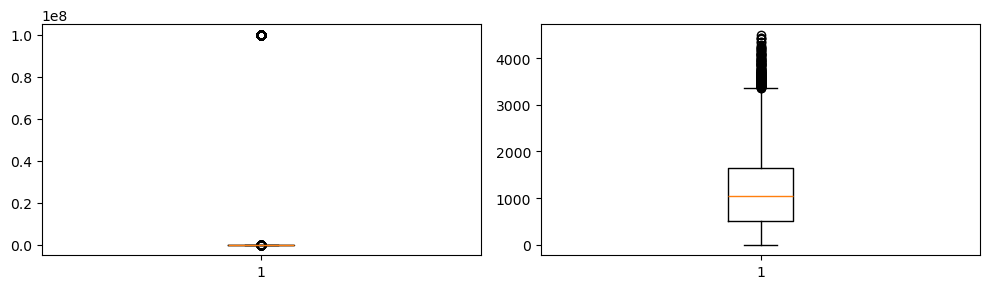

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

axes[0].boxplot(train_features['game_time'])

reasonable_max = train_features['game_time'].quantile(0.97)
data_reasonable = train_features[train_features['game_time'] <= reasonable_max]['game_time']
axes[1].boxplot(data_reasonable)

plt.tight_layout()
plt.show()

**Проверим на наличие пропущенных значений**

In [14]:
train_features.isnull().sum()

match_id                         0
game_time                        0
game_mode                        0
lobby_type                       0
objectives_len                   0
chat_len                         0
r1_hero_id                       0
r1_kills                      2777
r1_deaths                        0
r1_assists                       0
r1_denies                        0
r1_gold                          0
r1_lh                            0
r1_xp                            0
r1_health                        0
r1_max_health                    0
r1_max_mana                      0
r1_level                         0
r1_x                             0
r1_y                             0
r1_stuns                         0
r1_creeps_stacked                0
r1_camps_stacked                 0
r1_rune_pickups                  0
r1_firstblood_claimed            0
r1_teamfight_participation       0
r1_towers_killed                 0
r1_roshans_killed                0
r1_obs_placed       

Признаки r1_kills, r2_kills, r3_kills, r4_kills, r5_kills имееют 2777 пропусков

#### Посчитаем долю пропусков

In [15]:
train_features['r1_kills'].isnull().sum() / len(train_features['r1_kills'])

np.float64(0.09999279850208843)

#### Посмотрим на природу пропусков

In [16]:
kill_cols = ['r1_kills', 'r2_kills', 'r3_kills', 'r4_kills', 'r5_kills', 
             'd1_kills', 'd2_kills', 'd3_kills', 'd4_kills', 'd5_kills']

In [17]:
missing_kills = train_features[kill_cols].isnull().sum()
print(missing_kills)

r1_kills    2777
r2_kills    2777
r3_kills    2777
r4_kills    2777
r5_kills    2777
d1_kills       0
d2_kills       0
d3_kills       0
d4_kills       0
d5_kills       0
dtype: int64


In [18]:
# проверким на то, есть ли матчи с полностью пропущенными kills
complete_missing = train_features[kill_cols].isnull().all(axis=1).sum()
print(f"Матчей с полностью пропущенными kills: {complete_missing}")

Матчей с полностью пропущенными kills: 0


In [19]:
partial_missing = train_features[kill_cols].isnull().any(axis=1).sum() - complete_missing
print(f"Матчей с частично пропущенными kills: {partial_missing}")

Матчей с частично пропущенными kills: 11394


#### Посмотрим на баланс классов целевой переменной

<Axes: xlabel='radiant_win', ylabel='count'>

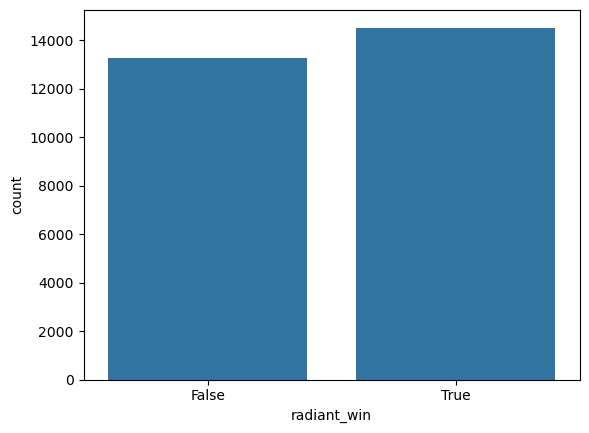

In [20]:
sns.countplot(x=train_targets['radiant_win'])

### Preprocessing (подготовка данных)

 В этом разделе вам необходимо реализовать подготовку ваших данных, в том числе заполнение пропусков, фильтрацию выбросов, кодирование категориальных признаков и т.д. В этот же раздел включите любые операции над данными, которые сочтете нужными.

#### Заполним пропуски в kills медианой по позиции

In [21]:
def fill_nan_kills(df):
    for col in kill_cols:
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)
    
    position_modes = {
        'r1_kills': df['r1_kills'].median(), 'd1_kills': df['d1_kills'].median(),
        'r2_kills': df['r2_kills'].median(), 'd2_kills': df['d2_kills'].median(),
        'r3_kills': df['r3_kills'].median(), 'd3_kills': df['d3_kills'].median(),
        'r4_kills': df['r4_kills'].median(), 'd4_kills': df['d4_kills'].median(),
        'r5_kills': df['r5_kills'].median(), 'd5_kills': df['d5_kills'].median(),
    }
    for col, mode_val in position_modes.items():
        df[col] = df[col].fillna(mode_val)
        
    return df

In [22]:
train_features = fill_nan_kills(train_features)
test = fill_nan_kills(test)

#### Почистим от выбросов столбец game_time

In [23]:
train_lower = 2 * 60    # снизу ограничим на 2 минуты
train_upper = 2 * 60 * 60  # сверху ограничим на 2 часа

In [24]:
train_features['game_time'] = train_features['game_time'].clip(lower=train_lower, upper=train_upper)
test['game_time'] = test['game_time'].clip(lower=train_lower, upper=train_upper)

#### Избавимся от выбросов в столбцах r3_gold, r4_gold, d4_gold

In [25]:
def replace_outliers_with_median(df, gold_columns):
    df_processed = df.copy()
    
    for col in gold_columns:
        # Определяем выбросы по IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        non_outliers = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        median_val = non_outliers[col].median()

        outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
        df_processed.loc[outlier_mask, col] = median_val
        
        print(f"{col}: заменено {outlier_mask.sum()} выбросов на медиану {median_val:,.0f}")
    
    return df_processed

In [26]:
gold_cols = ['r2_gold', 'r3_gold', 'd4_gold']

In [27]:
train_features = replace_outliers_with_median(train_features, gold_cols)
test = replace_outliers_with_median(test, gold_cols)

r2_gold: заменено 1417 выбросов на медиану 5,215
r3_gold: заменено 1445 выбросов на медиану 5,193
d4_gold: заменено 1506 выбросов на медиану 5,120
r2_gold: заменено 347 выбросов на медиану 5,242
r3_gold: заменено 369 выбросов на медиану 5,243
d4_gold: заменено 389 выбросов на медиану 5,121


#### Добавим признак кд для каждого игрока обеих команд - (убийства + помощи) / смерти

In [28]:
def add_kd_ratios_safe(df):
    players = ['r1', 'r2', 'r3', 'r4', 'r5', 'd1', 'd2', 'd3', 'd4', 'd5']
    
    for player in players:
        kills_col = f'{player}_kills'
        deaths_col = f'{player}_deaths'
        assists_col = f'{player}_assists'
        kd_col = f'{player}_kd'
        df[kd_col] = (df[kills_col] + df[assists_col]) / df[deaths_col]
        df[kd_col] = df[kd_col].replace([np.inf, -np.inf], 10.0)
        df[kd_col] = df[kd_col].fillna(0.0)
    
    return df

train_features = add_kd_ratios_safe(train_features)
test = add_kd_ratios_safe(test)

#### Добавим objective_control      
Данная фича будет в комплексе оценивать влияние на победу признаков уничтожения башен, убийство рошана, и первого файта

In [29]:
def add_objective_control(df):
    df['radiant_towers_killed'] = sum(df[f'r{i}_towers_killed'] for i in range(1, 6))
    df['dire_towers_killed'] = sum(df[f'd{i}_towers_killed'] for i in range(1, 6))
    
    df['radiant_roshans_killed'] = sum(df[f'r{i}_roshans_killed'] for i in range(1, 6))
    df['dire_roshans_killed'] = sum(df[f'd{i}_roshans_killed'] for i in range(1, 6))
    
    df['radiant_firstblood_claimed'] = sum(df[f'r{i}_firstblood_claimed'] for i in range(1, 6))
    df['dire_firstblood_claimed'] = sum(df[f'd{i}_firstblood_claimed'] for i in range(1, 6))

    df['radiant_objective_control'] = df['radiant_towers_killed'] + 3 * df['radiant_roshans_killed'] + df['radiant_firstblood_claimed']
    df['dire_objective_control'] = df['dire_towers_killed'] + 3 * df['dire_roshans_killed'] + df['dire_firstblood_claimed']

    return df

train_features = add_objective_control(train_features)
test = add_objective_control(test)

#### Добавим командных фичей    
Просуммируем некоторые статистики игроков в команде

In [30]:
def add_team_features(df):
    for stat in ['kills', 'deaths', 'assists', 'gold', 'lh', 'xp', 'teamfight_participation', 'kd']:
        df[f'radiant_{stat}'] = sum(df[f'r{i}_{stat}'] for i in range(1, 6))
        df[f'dire_{stat}'] = sum(df[f'd{i}_{stat}'] for i in range(1, 6))
    return df

train_features = add_team_features(train_features)
test = add_team_features(test)

#### Добавим признаки, которые показывают разницу между основными командными статистиками

In [31]:
def add_delta_team_features(df):
    df['kd_advantage'] = df['radiant_kd'] - df['dire_kd']
    df['gold_advantage'] = df['radiant_gold'] - df['dire_gold']
    df['xp_advantage'] = df['radiant_xp'] - df['dire_xp']
    df['kill_advantage'] = df['radiant_kills'] - df['dire_kills']
    df['lh_advantage'] = df['radiant_lh'] - df['dire_lh']
    df['assists_advantage'] = df['radiant_assists'] - df['dire_assists']
    df['roshans_killed_advantage'] = df['radiant_roshans_killed'] - df['dire_roshans_killed']
    df['towers_killed_advantage'] = df['radiant_towers_killed'] - df['dire_towers_killed']
    df['teamfight_participation_advantage'] = df['radiant_teamfight_participation'] - df['dire_teamfight_participation']

    return df

train_features = add_delta_team_features(train_features)
test = add_delta_team_features(test)

#### Добавим фичи позиционирования игроков

In [32]:
def add_position_features(df):
    ROSHAN_PIT = (3500, 2500)
    RADIANT_BASE = (1500, 1500)
    DIRE_BASE = (4500, 4500)
    # Центры команд
    df['radiant_center_x'] = sum(df[f'r{i}_x'] for i in range(1, 6)) / 5
    df['radiant_center_y'] = sum(df[f'r{i}_y'] for i in range(1, 6)) / 5
    df['dire_center_x'] = sum(df[f'd{i}_x'] for i in range(1, 6)) / 5
    df['dire_center_y'] = sum(df[f'd{i}_y'] for i in range(1, 6)) / 5
    
    # Расстояние между командами
    df['teams_distance'] = np.sqrt(
        (df['radiant_center_x'] - df['dire_center_x'])**2 + 
        (df['radiant_center_y'] - df['dire_center_y'])**2
    )
    # кто дальше зашел
    df['radiant_aggression'] = df['radiant_center_x'] - 3000
    df['dire_aggression'] = 3000 - df['dire_center_x']
    
    # Расстояния до Рошана
    ROSHAN = (3500, 2500)
    df['radiant_distance_to_roshan'] = np.sqrt(
        (df['radiant_center_x'] - ROSHAN[0])**2 + 
        (df['radiant_center_y'] - ROSHAN[1])**2
    )
    df['dire_distance_to_roshan'] = np.sqrt(
        (df['dire_center_x'] - ROSHAN[0])**2 + 
        (df['dire_center_y'] - ROSHAN[1])**2
    )
    
    return df

train_features = add_position_features(train_features)
test = add_position_features(test)

#### Добавим признаки показывающие динамику игры каждую минуту

In [33]:
def time_feacure(df):
    df['xp_advantage_ratio'] = df['radiant_xp'] / (df['dire_xp'] + 1)
    df['gold_advantage_per_minute'] = df['gold_advantage'] / (df['game_time'] / 60)
    df['objectives_per_minute'] = df['towers_killed_advantage'] / (df['game_time'] / 60)
    
    return df
    
train_features = time_feacure(train_features)
test = time_feacure(test)

#### Добавим фичи связанные с крипами

In [34]:
def add_creep_features(df):
    # Эффективность фарма в минуту
    df['radiant_lh_per_min'] = df['radiant_lh'] / (df['game_time'] / 60)
    df['dire_lh_per_min'] = df['dire_lh'] / (df['game_time'] / 60)
    df['lh_per_min_advantage'] = df['radiant_lh_per_min'] - df['dire_lh_per_min']
    
    # Общий контроль крипов (стаки + дени)
    df['radiant_creep_control'] = (
        df[['r1_creeps_stacked', 'r2_creeps_stacked', 'r3_creeps_stacked', 'r4_creeps_stacked', 'r5_creeps_stacked']].sum(axis=1) +
        df[['r1_denies', 'r2_denies', 'r3_denies', 'r4_denies', 'r5_denies']].sum(axis=1)
    )
    df['dire_creep_control'] = (
        df[['d1_creeps_stacked', 'd2_creeps_stacked', 'd3_creeps_stacked', 'd4_creeps_stacked', 'd5_creeps_stacked']].sum(axis=1) +
        df[['d1_denies', 'd2_denies', 'd3_denies', 'd4_denies', 'd5_denies']].sum(axis=1)
    )
    
    # Распределение фарма в команде
    radiant_lh = df[['r1_lh', 'r2_lh', 'r3_lh', 'r4_lh', 'r5_lh']]
    dire_lh = df[['d1_lh', 'd2_lh', 'd3_lh', 'd4_lh', 'd5_lh']]
    
    df['radiant_carry_farm_share'] = radiant_lh.max(axis=1) / (radiant_lh.sum(axis=1) + 1)
    df['dire_carry_farm_share'] = dire_lh.max(axis=1) / (dire_lh.sum(axis=1) + 1)
    
    return df

train_features = add_creep_features(train_features)
test = add_creep_features(test)

#### Выполним визуализацию     
Построим основные графики

Всего матчей: 27772
Побед Radiant: 52.29%
Побед Dire: 47.71%


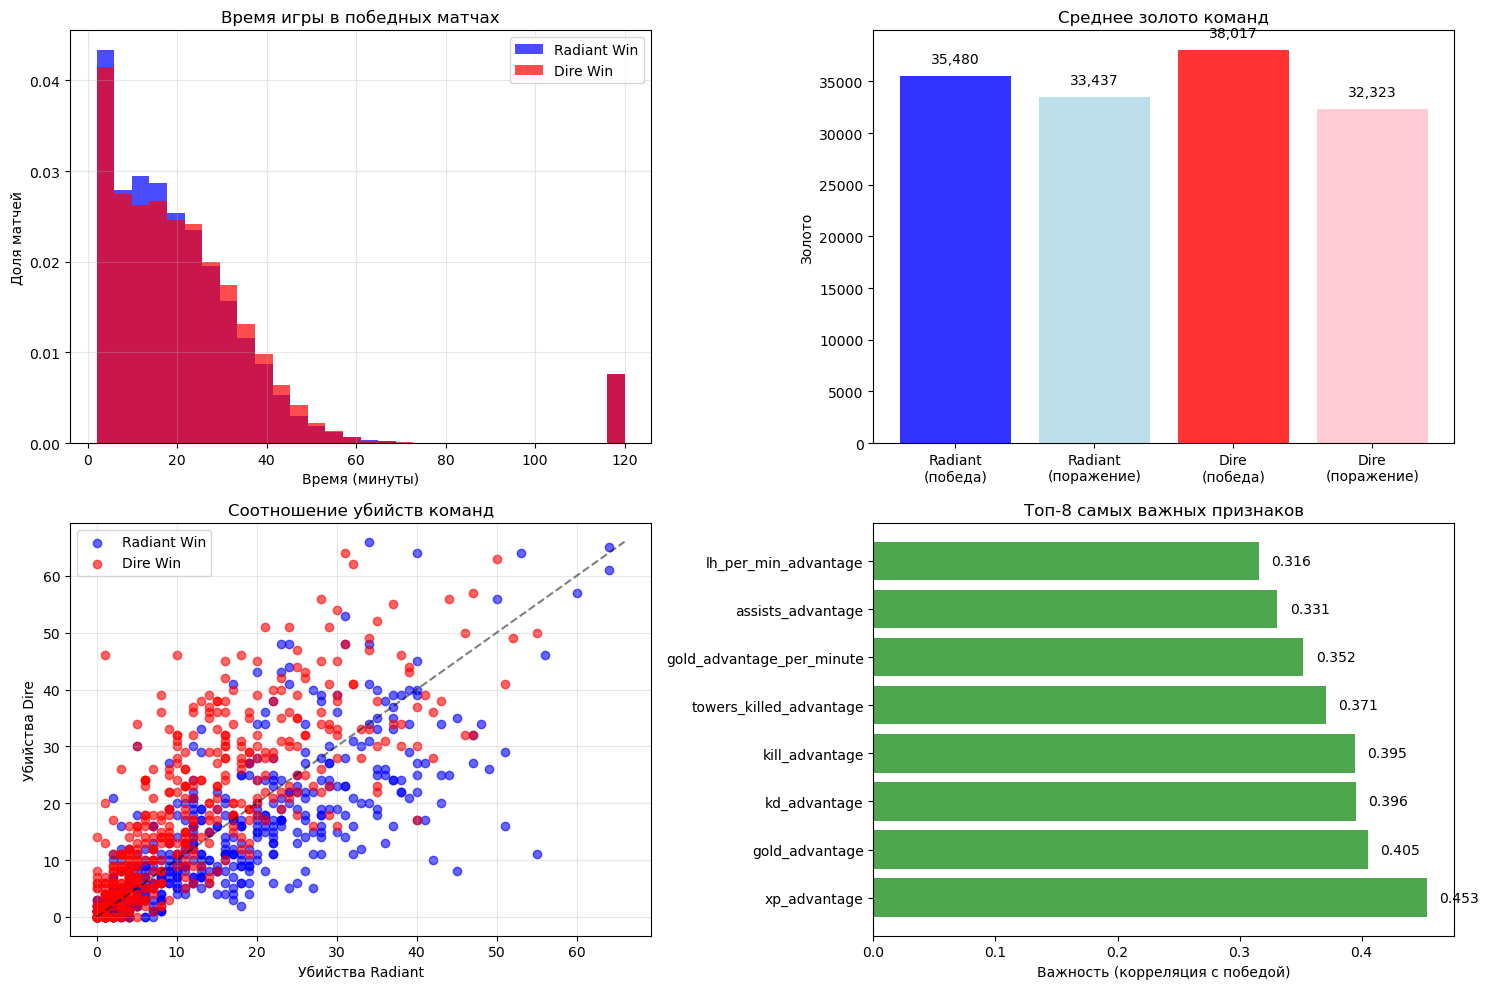

СТАТИСТИКА ПОБЕД:
 Убийства Radiant:
   В победах: 15.3
   В поражениях: 12.6
 Преимущество в золоте:
   Когда побеждает Radiant: +3,158
   Когда побеждает Dire: -4,580
 K/D керри Radiant:
   В победах: 3.93
   В поражениях: 2.51


In [35]:
def simple_dota_visualization(train_features, train_targets):
    """Визуализация данных"""
    
    df = train_features.copy()
    df['radiant_win'] = train_targets['radiant_win'].values
    
    print(f"Всего матчей: {len(df)}")
    print(f"Побед Radiant: {df['radiant_win'].mean():.2%}")
    print(f"Побед Dire: {1 - df['radiant_win'].mean():.2%}")
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    if 'game_time' in df.columns:
        df['game_time_min'] = df['game_time'] / 60
        
        # Разделяем по победам
        time_radiant_win = df[df['radiant_win'] == 1]['game_time_min']
        time_dire_win = df[df['radiant_win'] == 0]['game_time_min']
        
        axes[0,0].hist(time_radiant_win, bins=30, alpha=0.7, label='Radiant Win', color='blue', density=True)
        axes[0,0].hist(time_dire_win, bins=30, alpha=0.7, label='Dire Win', color='red', density=True)
        axes[0,0].set_title('Время игры в победных матчах')
        axes[0,0].set_xlabel('Время (минуты)')
        axes[0,0].set_ylabel('Доля матчей')
        axes[0,0].legend()
        axes[0,0].grid(True, alpha=0.3)
    
    if 'radiant_gold' in df.columns and 'dire_gold' in df.columns:
        avg_gold_radiant_win = df[df['radiant_win'] == 1]['radiant_gold'].mean()
        avg_gold_radiant_lose = df[df['radiant_win'] == 0]['radiant_gold'].mean()
        avg_gold_dire_win = df[df['radiant_win'] == 0]['dire_gold'].mean()
        avg_gold_dire_lose = df[df['radiant_win'] == 1]['dire_gold'].mean()
        
        teams = ['Radiant\n(победа)', 'Radiant\n(поражение)', 'Dire\n(победа)', 'Dire\n(поражение)']
        gold_values = [avg_gold_radiant_win, avg_gold_radiant_lose, avg_gold_dire_win, avg_gold_dire_lose]
        colors = ['blue', 'lightblue', 'red', 'pink']
        
        bars = axes[0,1].bar(teams, gold_values, color=colors, alpha=0.8)
        axes[0,1].set_title('Среднее золото команд')
        axes[0,1].set_ylabel('Золото')
        
        for bar, value in zip(bars, gold_values):
            axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000, 
                          f'{value:,.0f}', ha='center', va='bottom')
    
    if 'radiant_kills' in df.columns and 'dire_kills' in df.columns:
        sample_df = df.sample(min(1000, len(df)), random_state=42)
        
        radiant_win_mask = sample_df['radiant_win'] == 1
        axes[1,0].scatter(sample_df[radiant_win_mask]['radiant_kills'], 
                         sample_df[radiant_win_mask]['dire_kills'], 
                         alpha=0.6, color='blue', label='Radiant Win')
        axes[1,0].scatter(sample_df[~radiant_win_mask]['radiant_kills'], 
                         sample_df[~radiant_win_mask]['dire_kills'], 
                         alpha=0.6, color='red', label='Dire Win')
        
        axes[1,0].set_xlabel('Убийства Radiant')
        axes[1,0].set_ylabel('Убийства Dire')
        axes[1,0].set_title('Соотношение убийств команд')
        axes[1,0].legend()
        axes[1,0].grid(True, alpha=0.3)
        
        max_kills = max(sample_df[['radiant_kills', 'dire_kills']].max())
        axes[1,0].plot([0, max_kills], [0, max_kills], 'k--', alpha=0.5)
    
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    correlation_with_win = df[numeric_cols].corrwith(df['radiant_win']).abs().sort_values(ascending=False)
    
    top_features = []
    for feature, corr in correlation_with_win.items():
        if feature != 'radiant_win' and not feature.startswith(('radiant_', 'dire_', 'advantage')):
            top_features.append((feature, corr))
        if len(top_features) >= 8:
            break
    
    features, correlations = zip(*top_features)
    
    axes[1,1].barh(range(len(features)), correlations, color='green', alpha=0.7)
    axes[1,1].set_yticks(range(len(features)))
    axes[1,1].set_yticklabels(features)
    axes[1,1].set_xlabel('Важность (корреляция с победой)')
    axes[1,1].set_title('Топ-8 самых важных признаков')
    
    for i, corr in enumerate(correlations):
        axes[1,1].text(corr + 0.01, i, f'{corr:.3f}', va='center')
    
    plt.tight_layout()
    plt.show()
    
    print("СТАТИСТИКА ПОБЕД:")

    if 'radiant_kills' in df.columns:
        kills_radiant_win = df[df['radiant_win'] == 1]['radiant_kills'].mean()
        kills_radiant_lose = df[df['radiant_win'] == 0]['radiant_kills'].mean()
        print(f" Убийства Radiant:")
        print(f"   В победах: {kills_radiant_win:.1f}")
        print(f"   В поражениях: {kills_radiant_lose:.1f}")
    
    if 'gold_advantage' in df.columns:
        gold_adv_radiant_win = df[df['radiant_win'] == 1]['gold_advantage'].mean()
        gold_adv_dire_win = df[df['radiant_win'] == 0]['gold_advantage'].mean()
        print(f" Преимущество в золоте:")
        print(f"   Когда побеждает Radiant: +{gold_adv_radiant_win:,.0f}")
        print(f"   Когда побеждает Dire: {gold_adv_dire_win:,.0f}")
    
    if 'r1_kd' in df.columns:
        kd_radiant_win = df[df['radiant_win'] == 1]['r1_kd'].mean()
        kd_radiant_lose = df[df['radiant_win'] == 0]['r1_kd'].mean()
        print(f" K/D керри Radiant:")
        print(f"   В победах: {kd_radiant_win:.2f}")
        print(f"   В поражениях: {kd_radiant_lose:.2f}")

simple_dota_visualization(train_features, train_targets)

### Model & training (Выбор модели и её обучение)

В этом разделе описываете модель и ставите эксперименты по обучению.

Если вы ставили много экспериментов, приведите их в хронологическом порядке чтобы мы увидели эволюцию ваших рассуждений.

#### Подготовим данные для экспериментов

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import numpy as np
from sklearn.pipeline import Pipeline
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

#### Подготовим данные

In [37]:
X = train_features.drop(columns=['match_id'])
y = train_targets['radiant_win']
X_test = test.drop(columns=['match_id'])
ids = test['match_id']

#### Эксперимент 1

#### Здесь будем использовать несколько моделей
- XGBClassifier
- RandomForestClassifier
- CatBoostClassifier
            
Для каждой из них будем использовать GridSearchCV для подбора оптимальных гиперпараметров, а также лучшие модели будем сохранять для дальнейшего блендинга и стекинга

#### Создадим pipeline и определим параметры для GridSearch

In [44]:
cv = StratifiedKFold(n_splits=3, shuffle=True)

pipeline_cb = Pipeline([
    ('model', CatBoostClassifier(silent=True))
])
param_grid_cb = {
    'model__iterations': [200, 300],
    'model__learning_rate': [0.05, 0.1],
    'model__depth': [4, 6],
    'model__l2_leaf_reg': [1, 3, 5]
}

pipeline_rf = Pipeline([
    ('model', RandomForestClassifier(n_jobs=-1))
])
param_grid_rf = {
    'model__n_estimators': [150, 200],
    'model__max_depth': [10, 20, None],
    'model__min_samples_split': [2, 5]
}

pipeline_xgb = Pipeline([
    ('model', XGBClassifier(n_jobs=-1, eval_metric='auc'))
])
param_grid_xgb = {
    'model__n_estimators': [180, 200],
    'model__max_depth': [4, 6],
    'model__learning_rate': [0.05, 0.1],
    'model__subsample': [0.8, 1.0]
}

#### Выполним подбор гиперпараметров и посмотрим на ROC-AUC на кросс-валидации для каждой модели

In [45]:
%%time
model_configs = {
    'CatBoostClassifier': (pipeline_cb, param_grid_cb),
    'RandomForest': (pipeline_rf, param_grid_rf), 
    'XGBClassifier': (pipeline_xgb, param_grid_xgb)
}

best_estimators = {}
scores = {}

for model_label, (pipeline, hyperparams) in model_configs.items():
    print(f"Обучаем {model_label}")
    
    search = GridSearchCV(
        estimator=pipeline,
        param_grid=hyperparams,
        cv=cv,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=0
    )
    
    search.fit(X, y)
    # сохраняем лучшую модель для последующего стекинга
    best_estimators[model_label] = search.best_estimator_
    # сохраняем лучший скор для последующего анализа качества моделей
    scores[model_label] = search.best_score_
    
    print(f"Лучший ROC-AUC на кросс-валидации: {search.best_score_:.4f}")

Обучаем CatBoostClassifier
Лучший ROC-AUC на кросс-валидации: 0.8187
Обучаем RandomForest
Лучший ROC-AUC на кросс-валидации: 0.8158
Обучаем XGBClassifier
Лучший ROC-AUC на кросс-валидации: 0.8188
CPU times: total: 3min 47s
Wall time: 15min 52s


#### Эксперимент 2

#### Здесь будем использовать блендинг моделей из экперимента 1    
Просто попробуем усреднить предсказание базовых моделей

In [47]:
%%time
test_preds_blend = np.zeros(test.shape[0])

for name, model in best_estimators.items():
    preds = model.predict_proba(X_test)[:, 1]
    test_preds_blend += preds

test_preds_blend /= len(best_estimators)

submission_blend = pd.DataFrame({
    'match_id': ids,
    'radiant_win': test_preds_blend
})
submission_blend.to_csv('sample_submission.csv', index=False)

CPU times: total: 1.78 s
Wall time: 464 ms


ROC-AUC на kaggle 0.814

#### Эксперимент 3

#### Попробуем объеденить лучшие модели из эксперимента 1 в стек
Мета-моделью будет LogisticRegression

In [48]:
%%time
estimators = [(name, model) for name, model in best_estimators.items()]
final_estimator = LogisticRegression()

stacker = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=cv,
    n_jobs=-1,
    passthrough=False
)

stacker.fit(X, y)

stacking_score = cross_val_score(stacker, X, y, cv=cv, scoring='roc_auc').mean()
scores['Stacking'] = stacking_score
print(f"Stacking ROC-AUC: {stacking_score:.4f}")

Stacking ROC-AUC: 0.8191
CPU times: total: 11.3 s
Wall time: 5min 40s


In [49]:
stacking_preds = stacker.predict_proba(X_test)[:, 1]
submission_stack = pd.DataFrame({
    'match_id': ids,
    'radiant_win': stacking_preds
})
submission_stack.to_csv('sample_submission.csv', index=False)

ROC-AUC на kaggle 0.815

### Кастомный Стекинг (был написан ради эксперимента и улучшения навыков работы с различными моделями)

**Здесь используется стекинг, то есть проиходит обучение базовых моделей на отдельных фолдах и далее усредняется предсказание по фолдам для каждой модели. После чего для финального предсказания используется мета модель.**

Три модели будем использовать из первого экперимента, так как лучшие параметры для них были подобраны с помощью GridSearch

In [50]:
X = X.to_numpy()
y = y.to_numpy()
X_test = X_test.to_numpy()

In [52]:
base_models = {
    'rf': best_estimators['RandomForest'],
    'lr': LogisticRegression(C=0.1, max_iter=1000),
    'xgb': best_estimators['XGBClassifier'],
    'catboost': best_estimators['CatBoostClassifier']
}
meta_model = LogisticRegression(C=0.1, max_iter=1000)

In [53]:
kf = KFold(n_splits=5, shuffle=True)
meta_train = np.zeros((X.shape[0], len(base_models)))
trained_models_info = {}

#### Обучение моделей на соответствующих фолдах

In [54]:
%%time
for model_idx, (name, model) in enumerate(base_models.items()):

    model_meta_train = np.zeros(X.shape[0])
    trained_fold_models = []
    
    for fol_idx, (train_fold, val_fold) in enumerate(kf.split(X, y)):
        X_train_fold, X_val_fold = X[train_fold], X[val_fold]
        y_train_fold, y_val_fold = y[train_fold], y[val_fold]

        # Создаем копию модели для каждого фолда
        from sklearn.base import clone
        model_copy = clone(model)
        model_copy.fit(X_train_fold, y_train_fold)

        y_val_pred = model_copy.predict_proba(X_val_fold)[:, 1]
        model_meta_train[val_fold] = y_val_pred

        trained_fold_models.append(model_copy)  # Сохраняем копию модели

        meta_train[:, model_idx] = model_meta_train
        trained_models_info[name] = trained_fold_models
        
        print(f"Модель {name} завершена")
        

Модель rf завершена
Модель rf завершена
Модель rf завершена
Модель rf завершена
Модель rf завершена
Модель lr завершена
Модель lr завершена
Модель lr завершена
Модель lr завершена
Модель lr завершена
Модель xgb завершена
Модель xgb завершена
Модель xgb завершена
Модель xgb завершена
Модель xgb завершена
Модель catboost завершена
Модель catboost завершена
Модель catboost завершена
Модель catboost завершена
Модель catboost завершена
CPU times: total: 19min 23s
Wall time: 3min 29s


#### Обучаем мета модель

In [55]:
meta_model.fit(meta_train, y)

LogisticRegression(C=0.1, max_iter=1000)

In [56]:
# Создаем пустую матрицу для мета-признаков тестовых данных
meta_test = np.zeros((X_test.shape[0], len(base_models)))
    
# Сздаем мета-признаки для тестовых данных
for model_idx, (name, trained_fold_models) in enumerate(trained_models_info.items()):
    model_test_preds = np.zeros(X_test.shape[0])
        
    # Усредняем предсказания всех фолдов
    for fold_model in trained_fold_models:
        # Используем уже обученную модель
        fold_pred = fold_model.predict_proba(X_test)[:, 1]
        model_test_preds += fold_pred
        
    # Усредняем предсказания по фолдам
    meta_test[:, model_idx] = model_test_preds / len(trained_fold_models)

#### Предсказываем с помощью мета-модели

In [57]:
proba =  meta_model.predict_proba(meta_test)[:, 1]
df = pd.DataFrame({
    'match_id': ids,
    'radiant_win' : proba

})
df.to_csv('sample_submission.csv', index=False)

На kaggle удалось выбить 0.816

### Evaluation (оценка качества модели)

В этом разделе проводите оценку качества вашей итоговой модели. 

РЕЗУЛЬТАТЫ МОДЕЛЕЙ
CatBoostClassifier ROC-AUC: 0.8187
RandomForest    ROC-AUC: 0.8158
XGBClassifier   ROC-AUC: 0.8188
Stacking        ROC-AUC: 0.8191

ЛУЧШАЯ МОДЕЛЬ: Stacking (ROC-AUC: 0.8191)


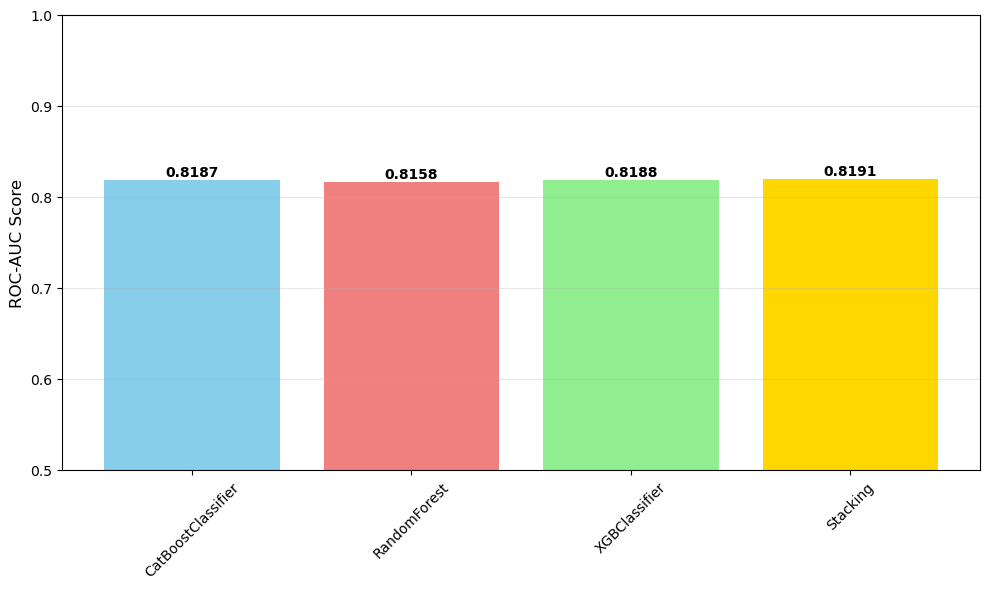

In [58]:
print("РЕЗУЛЬТАТЫ МОДЕЛЕЙ")
for name, score in scores.items():
    print(f"{name:15} ROC-AUC: {score:.4f}")

best_model_name = max(scores, key=scores.get)
best_score = scores[best_model_name]
print(f"\nЛУЧШАЯ МОДЕЛЬ: {best_model_name} (ROC-AUC: {best_score:.4f})")

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
models_list = list(scores.keys())
scores_list = list(scores.values())

bars = plt.bar(models_list, scores_list, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
for bar, score in zip(bars, scores_list):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
             f'{score:.4f}', ha='center', va='bottom', fontweight='bold')

plt.ylabel('ROC-AUC Score', fontsize=12)
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Но, на мой взгяд, лучше использовать более простую модель, например, CatBoost. Она не сильно уступает Stacking

### Conclusion (Выводы)

В этом разделе описываете полученные результаты и проводите анализ выполненной работы. 
Что получилось / не получилось и почему?

##### Результаты     
В ходе лабораторной работы были обучены и оценены различные модели для прогнозировани вероятности победы сил света игры DOTA2.            

##### Что получилось:
Получилось провести неплохой feature engineering, который значительно улучшил score моделей.        
Получилось на практике применить знания, полученные на лекциях и семинарах.             
Был написан свой стекинг, который на kaggle выбил 0.816 (лучший score в моей работе)         
    
##### Что не получилось                       
Была попытка распарсить файл tome_of_knowledge.jsonl, но я потерпел неудачу.         
Не смог грамотно проанализировать подробный датасет по матчам.        
Были получены пики команд в каждом матче, но данная информация не была применена в данной работе.       
Также после анализа tome_of_knowledge.jsonl стало ясно, что **game_time** это не общее время игры, а момент игры, за который приведены данные.